In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
import sklearn.metrics as metrics
import time
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSV/Phishing_Legitimate_full.csv")


In [ ]:
df_t = df.drop('id', axis=1)
df_t

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [ ]:
obj_padronizaçao = StandardScaler().fit(df_t)

In [ ]:
df_padronizado = obj_padronizaçao.transform(df_t)

In [ ]:
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname', 'AtSymbol','TildeSymbol',
                          'NumUnderscore', 'NumPercent','NumQueryComponents', 'NumAmpersand','NumHash','NumNumericChars','NoHttps',
                          'RandomString','IpAddress','DomainInSubdomains','DomainInPaths','HttpsInHostname','HostnameLength','PathLength',
                          'QueryLength','DoubleSlashInPath','NumSensitiveWords','EmbeddedBrandName','PctExtHyperlinks','PctExtResourceUrls',
                          'ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','AbnormalFormAction','PctNullSelfRedirectHyperlinks',
                          'FrequentDomainNameMismatch','FakeLinkInStatusBar','RightClickDisabled','PopUpWindow','SubmitInfoToEmail',
                          'IframeOrFrame','MissingTitle','ImagesOnlyInForm','SubdomainLevelRT','UrlLengthRT','PctExtResourceUrlsRT',
                          'AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT','CLASS_LABEL']

In [ ]:
train_x = df_padronizado.drop('CLASS_LABEL', axis = 1)

In [ ]:
train_y = df['CLASS_LABEL']

In [ ]:
test_x = df_padronizado.drop('CLASS_LABEL', axis = 1)
test_y = df['CLASS_LABEL']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x,train_y, test_size = 0.3)

In [ ]:
df_n = df.drop(['id', 'NumDash', 'AtSymbol', 'NumPercent', 'NumHash', 'NoHttps','DomainInPaths', 'HttpsInHostname', 'DoubleSlashInPath', 'RelativeFormAction', 'FakeLinkInStatusBar', 'PopUpWindow',
                'SubmitInfoToEmail', 'IframeOrFrame', 'ImagesOnlyInForm', 'PctExtNullSelfRedirectHyperlinksRT'], axis = 1)
df_n

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDashInHostname,TildeSymbol,NumUnderscore,NumQueryComponents,NumAmpersand,NumNumericChars,RandomString,IpAddress,DomainInSubdomains,HostnameLength,PathLength,QueryLength,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,RightClickDisabled,MissingTitle,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,21,44,0,0,0,0.000000,0.250000,1,1,0,0,0.000000,0,0,0,1,0,1,1,-1,1
1,3,1,3,144,0,0,2,2,1,41,0,0,0,17,16,103,1,0,0.000000,0.000000,0,1,0,0,0.000000,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,27,24,0,0,0,0.375000,1.000000,1,1,0,0,0.000000,0,0,0,1,0,-1,1,-1,1
3,3,1,6,79,0,0,0,0,0,0,0,0,0,22,50,0,0,1,1.000000,0.095238,1,1,0,0,0.000000,1,0,0,1,-1,1,1,1,1
4,3,0,4,46,0,0,0,0,0,2,1,0,0,10,29,0,0,0,1.000000,1.000000,0,0,1,0,0.000000,1,0,0,1,1,-1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,2,1,9,0,0,0,15,10,17,0,0,0.096774,0.757143,1,1,0,0,0.000000,0,0,0,1,1,-1,1,0,0
9996,2,1,4,59,0,0,0,0,0,0,1,0,0,19,33,0,0,0,0.161290,0.275862,0,1,0,0,0.129032,0,0,0,1,0,0,1,0,0
9997,2,1,4,57,0,0,0,0,0,6,1,0,0,16,34,0,0,0,0.070423,0.500000,0,1,0,0,0.056338,0,0,0,1,0,1,1,0,0
9998,3,1,1,49,0,0,0,1,0,3,0,0,0,15,13,13,0,0,0.166667,0.428571,0,1,0,0,0.000000,0,0,0,1,1,0,1,0,0


In [ ]:
df_t.corr().style.background_gradient(cmap='Reds')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
NumDots,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,0.169283,0.255404,0.371642,0.211384,0.024590,-0.064631,0.158447,0.238473,0.009897,nan,0.289482,0.000579,0.263039,0.002462,0.305793,0.164434,0.116726,-0.042685,0.050103,0.072103,-0.088802,-0.009604,-0.031990,0.033516,0.177703,-0.002490,0.050992,-0.031698,-0.117766,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,-0.029706,-0.031766,-0.018054,0.051744,-0.044628,0.076544,-0.103343,0.522014,-0.019847,nan,0.605218,-0.039307,-0.026179,0.012070,0.158365,0.019471,-0.063890,-0.079427,-0.033224,-0.040207,-0.020441,0.002922,0.029142,0.106631,-0.061013,-0.023893,0.133530,-0.010968,-0.027739,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,-0.140303,-0.104935,0.007947,0.233024,0.058466,0.250091,0.017895,0.014693,0.261468,nan,0.013025,0.612786,-0.085555,0.020221,0.121805,0.087328,0.018365,-0.038542,0.082978,0.099618,0.007842,-0.012905,-0.033858,0.085679,0.028918,-0.004003,0.049318,0.014823,-0.061813,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,0.476699,0.466038,0.227029,0.637872,0.036667,0.230698,0.094311,0.120201,0.227722,nan,0.162770,0.643924,0.649204,0.000162,0.223492,0.026183,-0.095430,-0.045713,0.061362,-0.004030,0.048207,0.015086,0.023152,-0.090563,-0.099667,0.014242,0.087848,0.034980,0.042056,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,-0.064746,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.056135,0.056684,0.315989,nan,0.010045,0.605889,-0.013725,-0.001462,-0.081733,-0.043440,-0.070490,0.116288,0.086994,-0.091292,0.094711,0.077007,0.049723,-0.113173,-0.188701,-0.007831,0.063704,0.092634,0.181687,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,-0.042379,-0.036415,-0.008395,0.120447,-0.089577,0.073574,-0.033672,0.542477,0.038602,nan,0.550247,0.000450,-0.029753,0.065692,0.081098,0.013179,-0.025364,-0.078277,0.004301,0.011456,0.075694,-0.011151,-0.041690,0.177997,-0.019193,-0.009018,0.439129,-0.015237,-0.059574,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,0.007226,-0.005908,-0.004298,-0.000832,0.004545,0.001844,0.016471,-0.002292,-0.002610,0.008322,nan,-0.013143,0.005943,-0.006132,-0.000520,-0.005135,0.020623,-0.007698,-0.007710,0.007712,0.007448,-0.009967,0.013264,-0.004283,-0.005682,-0.009074,-0.001288,-0.002064,-0.001216,-0.006661,-0.012422,-0.003160,-0.003067,0.003031,-0.00746

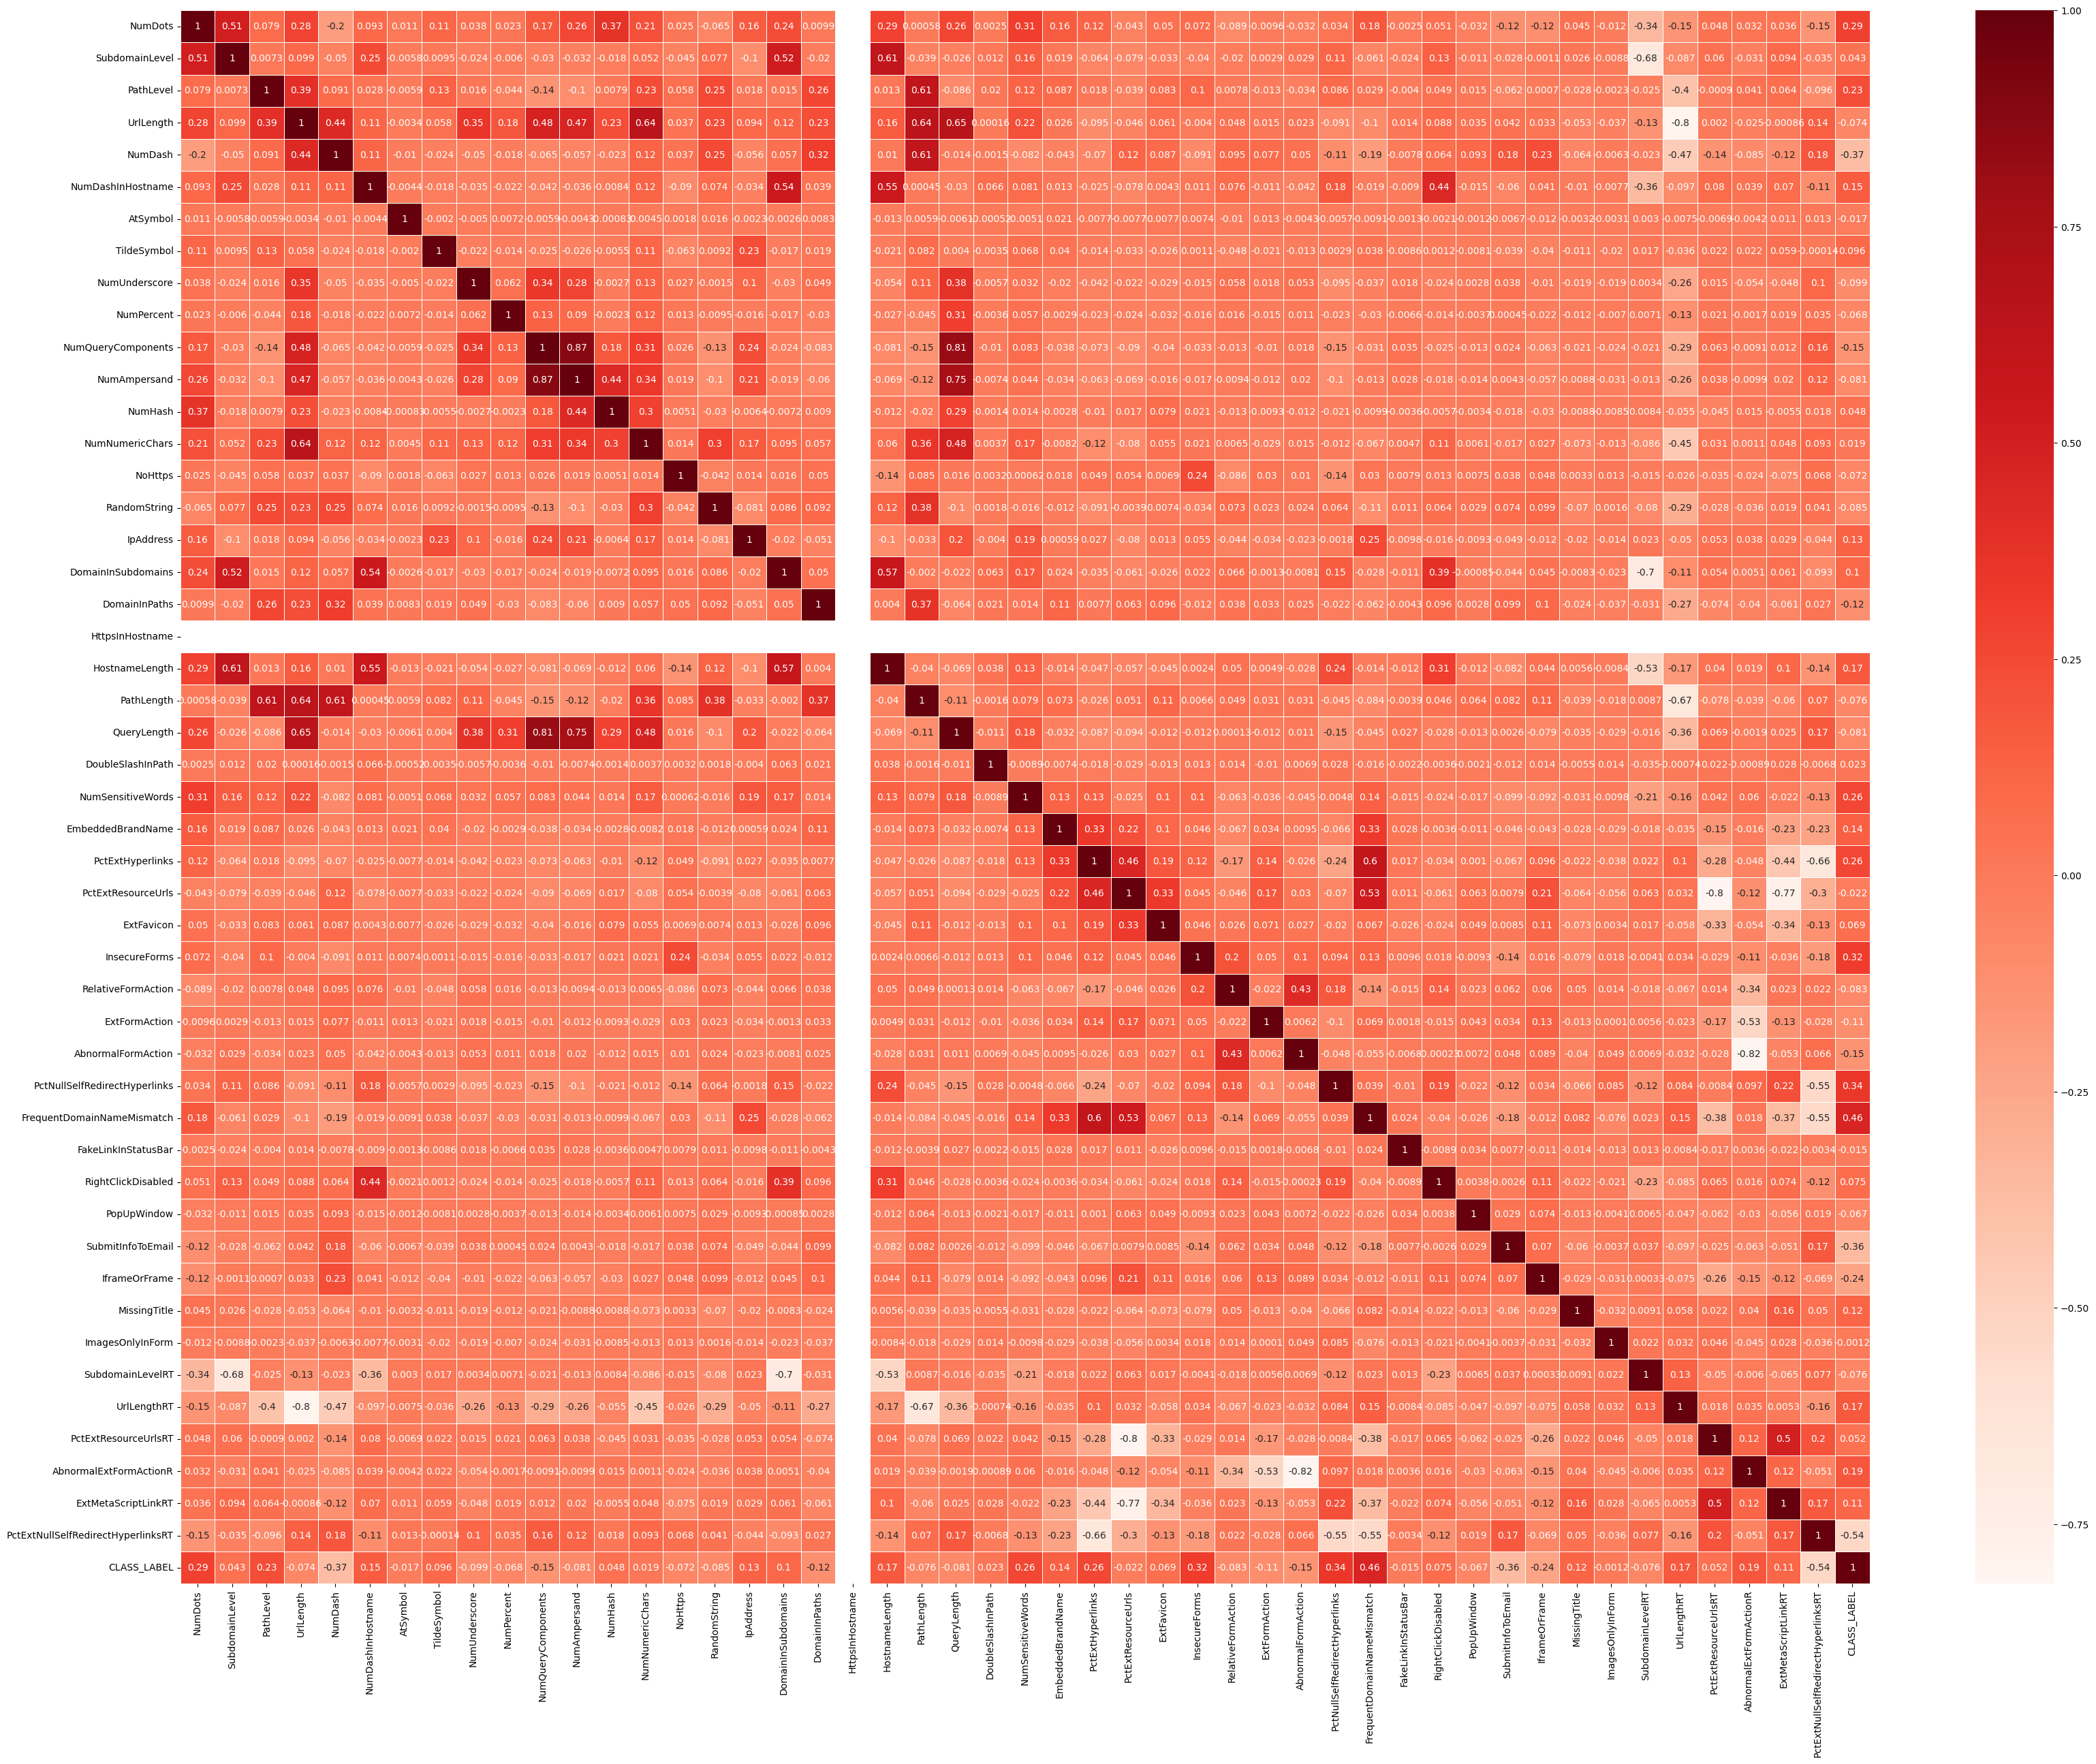

In [ ]:
fig, ax = plt.subplots(figsize=(40,30))

_ = sns.heatmap(df_t.corr(), cmap='Reds', linewidth = 0.5, annot = True)

In [ ]:
df['CLASS_LABEL'].drop_duplicates(keep='last')

4999    1
9999    0
Name: CLASS_LABEL, dtype: int64

In [ ]:
pd.isna(df).sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
pd.isna(df).sum().to_frame('VOID')

In [ ]:
train, test = train_test_split(df_t, test_size= 0.2)

In [ ]:
train.count()

In [ ]:
train_x = train.drop('CLASS_LABEL', axis = 1)
train_y = train['CLASS_LABEL']

In [ ]:
test_x = test.drop('CLASS_LABEL', axis = 1)
test_y = test['CLASS_LABEL']

Teste com Hiperparametros

In [ ]:
#Criando modelo
randomForest = RandomForestClassifier()
n_estimators = np.array([100,150,200,250,300])
max_depth = np.array([10,20])
criterion = np.array(["gini","entropy"])
max_features = np.array(["sqrt","log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])
bootstrap = np.array([True,False])

#Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       bootstrap = bootstrap)
randomForest = GridSearchCV(randomForest, grid_parametros, cv=3, n_jobs = 8)
randomForest.fit(train_x, train_y)

In [ ]:
#Testando os hiperparam
print(f'Acuracia em treinamento:{randomForest.best_score_:.2%}\n')
print(f'Melhores hiperparam:{randomForest.best_params_}\n')



Acuracia em treinamento:98.39%

Melhores hiperparam:{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}



In [ ]:
MLP = MLPClassifier(max_iter=1000, tol=0.0000100, hidden_layer_sizes=(25,25),
                    learning_rate = 'adaptive', learning_rate_init = 0.005, solver ='adam').fit(train_x, train_y)

In [ ]:
CLF = MLPClassifier(hidden_layer_sizes=(50),max_iter=1000, solver ='adam', activation = 'relu',
                    tol=0.00001, learning_rate = 'adaptive',learning_rate_init = 0.005).fit(train_x, train_y)

In [ ]:
CLF18 = MLPClassifier(hidden_layer_sizes=(18),max_iter=1000, solver ='adam', activation = 'relu', tol=0.00001,
                      learning_rate = 'adaptive',learning_rate_init = 0.005).fit(train_x, train_y)

In [ ]:
CLF24 = MLPClassifier(hidden_layer_sizes=(24),max_iter=1000, solver ='adam', activation = 'relu', tol=0.00001,
                      learning_rate = 'adaptive',learning_rate_init = 0.005).fit(train_x, train_y)

In [ ]:
CLF18_10 = MLPClassifier(hidden_layer_sizes=(18, 10),max_iter=1000, solver ='adam', activation = 'relu',
                         tol=0.00001, learning_rate = 'adaptive',learning_rate_init = 0.005).fit(train_x, train_y)

In [ ]:
CLF_predict = CLF.predict(test_x)
CLF18_predict = CLF18.predict(test_x)
CLF24_predict = CLF24.predict(test_x)
CLF18_10_predict = CLF18_10.predict(test_x)
MLP_predict = MLP.predict(test_x)

In [ ]:
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)

SVM = SVC().fit(train_x, train_y)
RF = RandomForestClassifier(n_estimators = 100, criterion ='log_loss').fit(train_x, train_y)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=13).fit(train_x, train_y)

In [ ]:
RF_predict = RF.predict(test_x)

In [ ]:
print("Acuracy LDA:", LDA.score(test_x, test_y), "\n")
print("Acuracy DT:", DT.score(test_x, test_y), "\n")
print("Acuracy KNN:", KNN.score(test_x, test_y), "\n")
print("Acuracy SVM:", SVM.score(test_x, test_y), "\n")
print("Acuracy RF:", RF.score(test_x, test_y), "\n")

Acuracy LDA: 0.944 

Acuracy DT: 0.9675 

Acuracy KNN: 0.8495 

Acuracy SVM: 0.8635 

Acuracy RF: 0.982 



In [ ]:
print("Acuracy CLF:", CLF.score(test_x, test_y), "\n")
print("Acuracy CLF18:", CLF18.score(test_x, test_y), "\n")
print("Acuracy CLF24:", CLF24.score(test_x, test_y), "\n")
print("Acuracy CLF18_10:", CLF18_10.score(test_x, test_y), "\n")
print("Acuracy MLP:", MLP.score(test_x, test_y), "\n")

Acuracy CLF: 0.9643333333333334 

Acuracy CLF18: 0.97 

Acuracy CLF24: 0.9693333333333334 

Acuracy CLF18_10: 0.971 

Acuracy MLP: 0.9723333333333334 



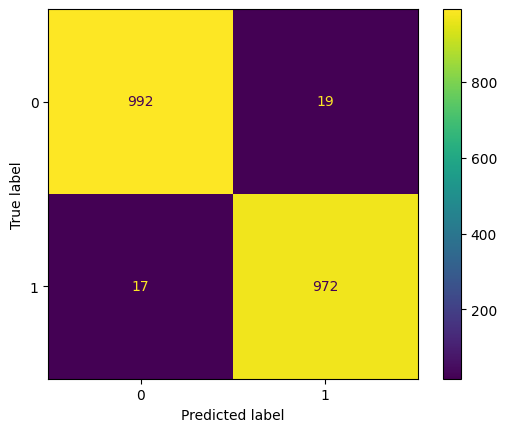

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF, test_x, test_y)
plt.show()

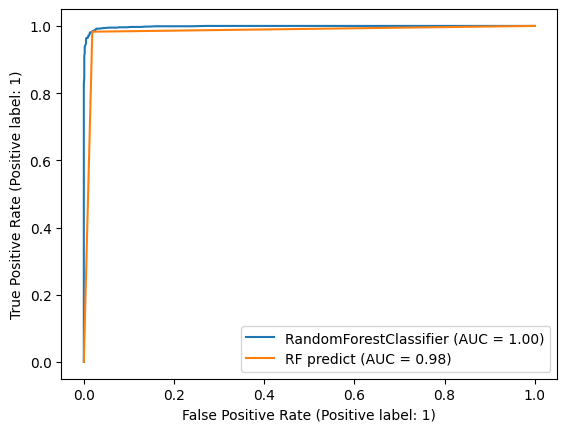

In [ ]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(RF, test_x, test_y, ax = ax)
logreg_y_pred = RF.predict(test_x)
metrics.RocCurveDisplay.from_predictions(test_y,logreg_y_pred, ax=ax, name="RF predict")